# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rizky Prayogi Reksomulyo
- **Email:** rizki45645@gmail.com
- **ID Dicoding:** ogiiii

## Menentukan Pertanyaan Bisnis

- pengaruh suhu dan kelembapan terhadap jumlah pengendara?
- apakah musim memengaruhi jumlah pengendara biasa vs. pengendara terdaftar?
- Bagaimana cuaca memengaruhi jumlah pengendara biasa vs. pengendara terdaftar?
- Apa saja bulan-bulan yang paling ramai untuk penyewaan sepeda?

## import packages

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



## Data Wrangling

### Gathering Data

load file csv

In [77]:
# Membaca file hour.csv
df_hour = pd.read_csv('C:/Users/rizki/Downloads/proyek_analisis_data/data/hour.csv')
print(df_hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Assessing Data

Menampilkan informasi tentang ringkasan statistik

In [78]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menampilkan informasi tentang data

In [79]:
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


### Cleaning Data

Mengecek duplikasi

In [80]:
df_hour.duplicated().sum()

0

Mengecek data yang hilang

In [81]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menghapus kolom yang tidak relevan untuk analisis

In [82]:
df_hour = df_hour.drop(['instant'], axis=1)

konversi kolom 'dteday'  menjadi format datetime

In [83]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

menggunakan MinMaxScaler pada kolom windspeed

In [84]:
# Buat objek MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transform kolom 'windspeed'
df_hour['windspeed'] = scaler.fit_transform(df_hour[['windspeed']])


## Exploratory Data Analysis (EDA)

cek ringkasan statistik deskriptif dari DataFrame

In [85]:
df_hour.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.223460,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.122840,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.228047,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.298225,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.143811,49.305030,151.357286,181.387599


tampilkan 5 data teratas

In [86]:
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengecek korelasi di antara kolom

In [87]:
df_hour[['season','weathersit','temp','workingday','weekday','windspeed','temp','hum','atemp','mnth','yr','hr','casual','registered','cnt']].corr()

,season,weathersit,temp,workingday,weekday,windspeed,temp,hum,atemp,mnth,yr,hr,casual,registered,cnt
season,1.000000,-0.014524,0.312025,0.013743,-0.002335,-0.149773,0.312025,0.150625,0.319380,0.830386,-0.010742,-0.006117,0.120206,0.174226,0.178056
weathersit,-0.014524,1.000000,-0.102640,0.044672,0.003311,0.026226,-0.102640,0.418130,-0.105563,0.005400,-0.019157,-0.020203,-0.152628,-0.120966,-0.142426
temp,0.312025,-0.102640,1.000000,0.055390,-0.001795,-0.023125,1.000000,-0.069881,0.987672,0.201691,0.040913,0.137603,0.459616,0.335361,0.404772
workingday,0.013743,0.044672,0.055390,1.000000,0.035955,-0.011830,0.055390,0.015688,0.054667,-0.003477,-0.002196,0.002285,-0.300942,0.134326,0.030284
weekday,-0.002335,0.003311,-0.001795,0.035955,1.000000,0.011502,-0.001795,-0.037158,-0.008821,0.010400,-0.004485,-0.003498,0.032721,0.021578,0.026900
windspeed,-0.149773,0.026226,-0.023125,-0.011830,0.011502,1.000000,-0.023125,-0.290105,-0.062336,-0.135386,-0.008740,0.137252,0.090287,0.082321,0.093234
temp,0.312025,-0.102640,1.000000,0.055390,-0.001795,-0.023125,1.000000,-0.069881,0.987672,0.201691,0.040913,0.137603,0.459616,0.335361,0.404772
hum,0.150625,0.418130,-0.069881,0.015688,-0.037158,-0.290105,-0.069881,1.000000,-0.051918,0.164411,-0.083546,-0.276498,-0.347028,-0.273933,-0.322911
atemp,0.319380,-0.105563,0.987672,0.054667,-0.008821,-0.062336,0.987672,-0.051918,1.000000,0.208096,0.039222,0.133750,0.454080,0.332559,0.400929
mnth,0.830386,0.005400,0.201691,-0.003477,0.010400,-0.135386,0.201691,0.164411,0.208096,1.000000,-0.010473,-0.005772,0.068457,0.122273,0.120638


cek total penyewaan sepeda untuk setiap kondisi cuaca

In [88]:
df_hour.groupby(by="weathersit").cnt.sum()

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

cek total penyewaan sepeda untuk setiap musim

In [89]:
df_hour.groupby(by="season").cnt.sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

cek total penyewaan sepeda untuk setiap bulan

In [90]:
df_hour.groupby(by="mnth").cnt.sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Buat cluster berdasarkan suhu dan kelembaban

In [91]:
df_hour['temp_cluster'] = pd.cut(df_hour['temp'], bins=3, labels=['Low', 'Medium', 'High'])
df_hour['hum_cluster'] = pd.cut(df_hour['hum'], bins=3, labels=['Low', 'Medium', 'High'])

Gabungkan cluster

In [92]:
df_hour['weather_cluster'] = df_hour['temp_cluster'].astype(str) + '_' + df_hour['hum_cluster'].astype(str)

# Analisis hasil
cluster_avg = df_hour.groupby('weather_cluster')['cnt'].mean().sort_values(ascending=False)
print(cluster_avg)

weather_cluster
High_Low         383.052486
High_Medium      324.647059
Medium_Low       296.179924
Medium_Medium    250.147839
High_High        193.767991
Medium_High      142.051975
Low_Low          135.482890
Low_Medium       107.937318
Low_High          75.997164
Name: cnt, dtype: float64


Visualisasi rata-rata Penyewaan berdasarkan suhu dan kelembaban

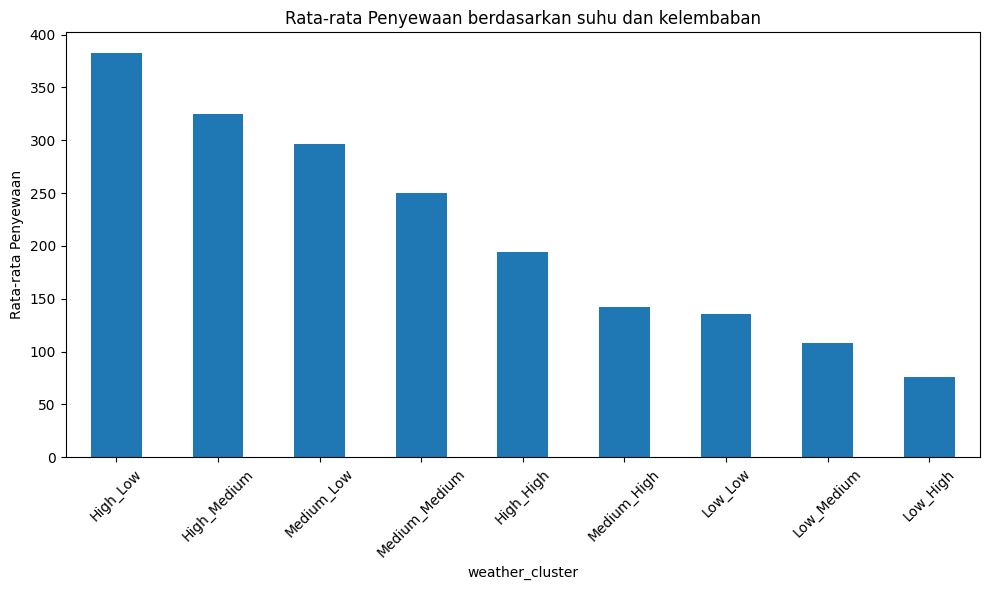

In [93]:
plt.figure(figsize=(10, 6))
cluster_avg.plot(kind='bar')
plt.title('Rata-rata Penyewaan berdasarkan suhu dan kelembaban')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



visualisasi clustering Berdasarkan Temperatur dan Kelembaban

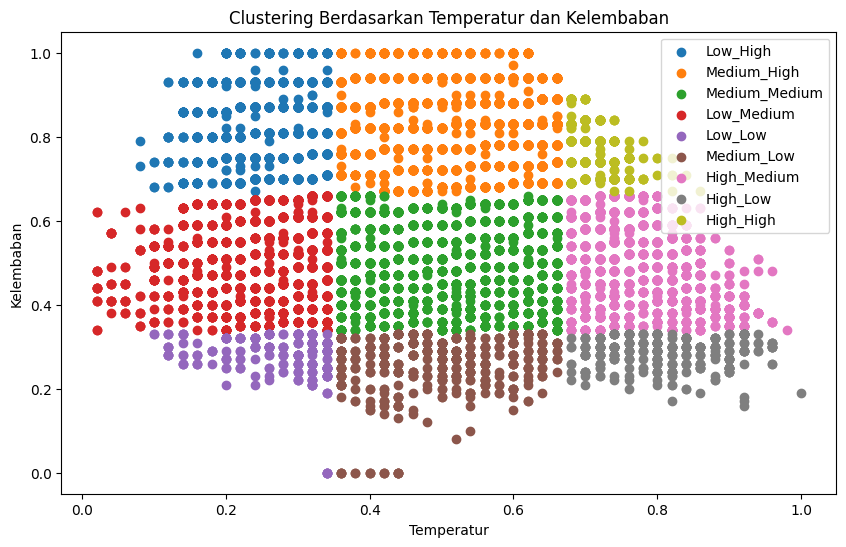

In [94]:
plt.figure(figsize=(10, 6))
for cluster in df_hour['weather_cluster'].unique():
    cluster_data = df_hour[df_hour['weather_cluster'] == cluster]
    plt.scatter(cluster_data['temp'], cluster_data['hum'], label=cluster)

plt.xlabel('Temperatur')
plt.ylabel('Kelembaban')
plt.title('Clustering Berdasarkan Temperatur dan Kelembaban')
plt.legend()
plt.show()

### Pertanyaan 2:

visualisasi dampak cuaca pada pengendara biasa vs pengendara terdaftar

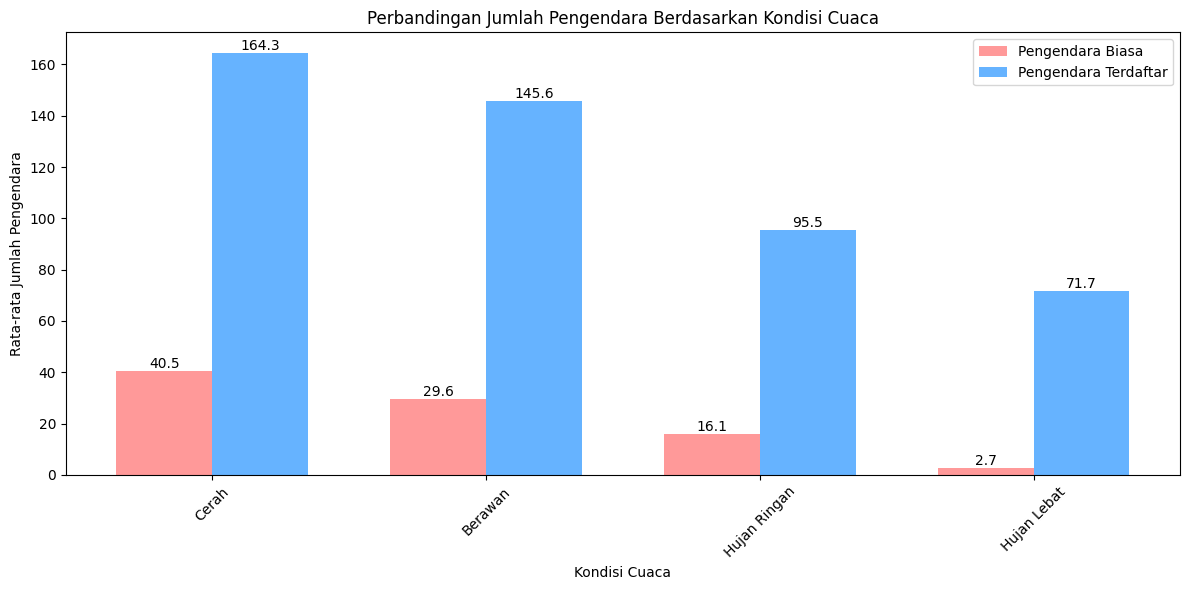

In [98]:
# Buat figure
plt.figure(figsize=(12, 6))

# Siapkan data
weather_data = df_hour.groupby('weathersit')[['casual', 'registered']].mean()

# Definisikan labels untuk kondisi cuaca
labels = ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat']

# Buat bar chart
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, weather_data['casual'], width, label='Pengendara Biasa', color='#ff9999')
plt.bar(x + width/2, weather_data['registered'], width, label='Pengendara Terdaftar', color='#66b3ff')

# Kustomisasi grafik
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengendara')
plt.title('Perbandingan Jumlah Pengendara Berdasarkan Kondisi Cuaca')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Tambahkan nilai di atas bar
for i, v in enumerate(weather_data['casual']):
    plt.text(i - width/2, v, f'{v:.1f}', ha='center', va='bottom')
for i, v in enumerate(weather_data['registered']):
    plt.text(i + width/2, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Pertanyaan 3:

visualisasi dampak musim pada pengendara kasual vs pengendara terdaftar

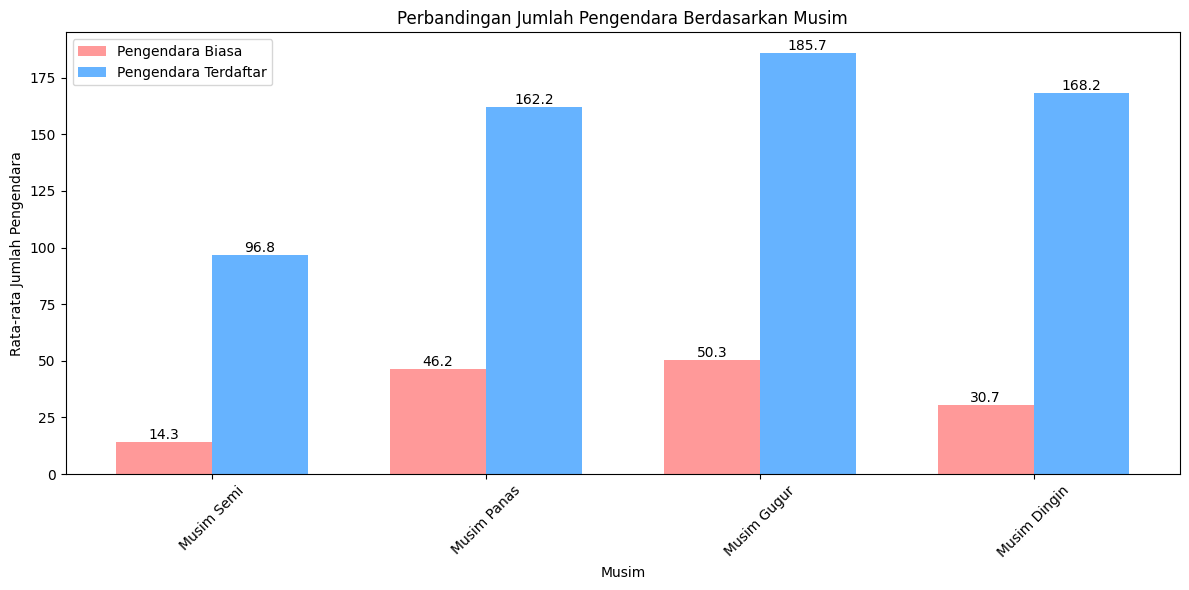

In [99]:
# Buat figure
plt.figure(figsize=(12, 6))

# Siapkan data
season_data = df_hour.groupby('season')[['casual', 'registered']].mean()

# Definisikan labels untuk musim
labels = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']

# Buat bar chart
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, season_data['casual'], width, label='Pengendara Biasa', color='#ff9999')
plt.bar(x + width/2, season_data['registered'], width, label='Pengendara Terdaftar', color='#66b3ff')

# Kustomisasi grafik
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Pengendara')
plt.title('Perbandingan Jumlah Pengendara Berdasarkan Musim')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Tambahkan nilai di atas bar
for i, v in enumerate(season_data['casual']):
    plt.text(i - width/2, v, f'{v:.1f}', ha='center', va='bottom')
for i, v in enumerate(season_data['registered']):
    plt.text(i + width/2, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Pertanyaan 4:

Visualisasi bulan tersibuk untuk penyewaan sepeda, dengan membandingkan Weekday dan Weekend

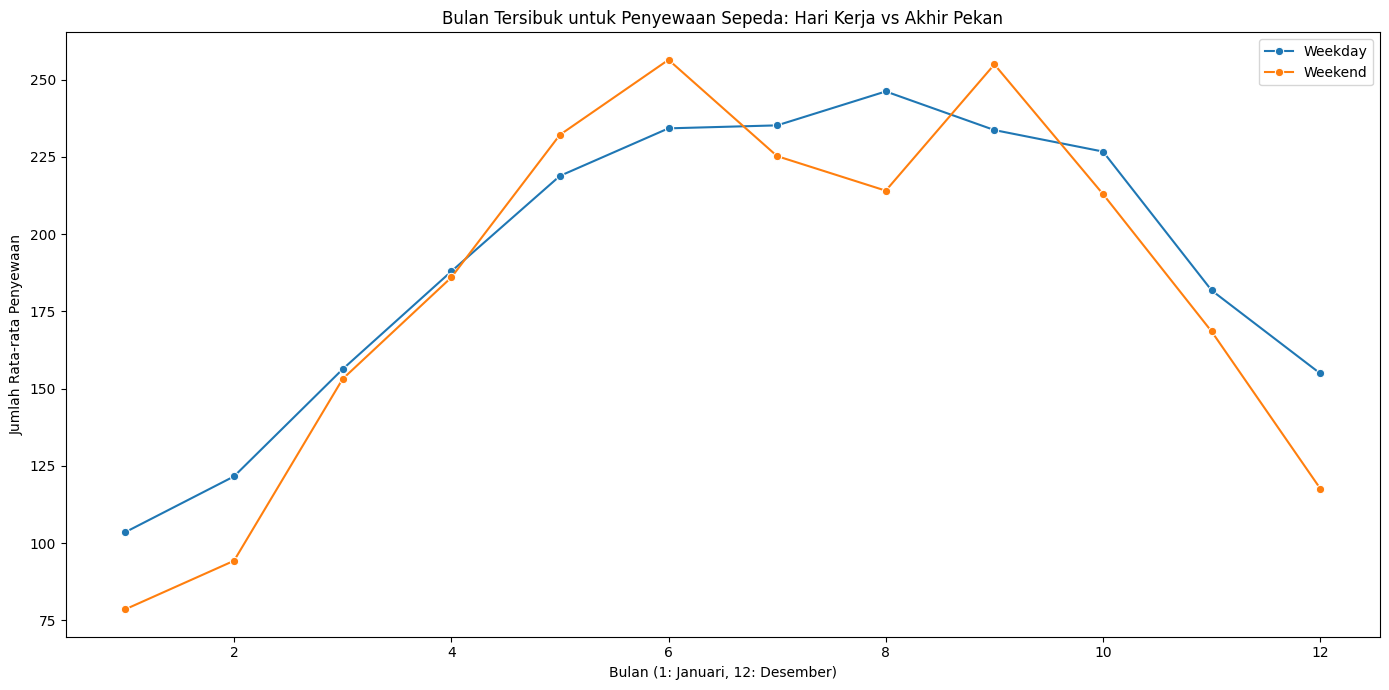

In [97]:
plt.figure(figsize=(14, 7))
month_weekday = df_hour[df_hour['workingday'] == 1].groupby('mnth')['cnt'].mean()
month_weekend = df_hour[df_hour['workingday'] == 0].groupby('mnth')['cnt'].mean()

sns.lineplot(x=month_weekday.index, y=month_weekday.values, label='Weekday', marker='o')
sns.lineplot(x=month_weekend.index, y=month_weekend.values, label='Weekend', marker='o')

plt.title('Bulan Tersibuk untuk Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Bulan (1: Januari, 12: Desember)')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

1. Berdasarkan analisis data, kondisi cuaca dengan temperatur tinggi dan kelembaban rendah (High_Low) terbukti Cuaca Hangat dan Kering paling optimal untuk mendukung aktivitas penyewaan. Kondisi ini diikuti oleh cuaca dengan temperatur tinggi dan kelembaban sedang (High_Medium) yang juga menunjukkan performa baik. Sebaliknya, Cuaca dengan temperatur rendah, terutama yang disertai kelembaban tinggi (Low_High), cenderung berkontribusi pada angka penyewaan yang lebih rendah, kemungkinan disebabkan oleh kondisi yang kurang ideal untuk aktivitas luar ruangan.

2. Kondisi cuaca secara signifikan mempengaruhi pengendara kasual lebih banyak daripada pengendara yang terdaftar.Jumlah rata-rata pengendara kasual menurun secara signifikan saat cuaca memburuk sebanyak.

3. Kondisi musim berdampak tapi tidak terlalu signifikan mempengaruhi pengendara kasual ataupun pengendara yang terdaftar. Hanya pada musim semi pengendara cukup mengalami menurunan.

4. Bulan-bulan musim gugur dan panas adalah periode puncak untuk penyewaan sepeda, terlepas dari hari apa pun dalam seminggu.
